In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2024-12-01 10:08:36.630308: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-01 10:08:36.701925: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-01 10:08:37.920944: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
Categories = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

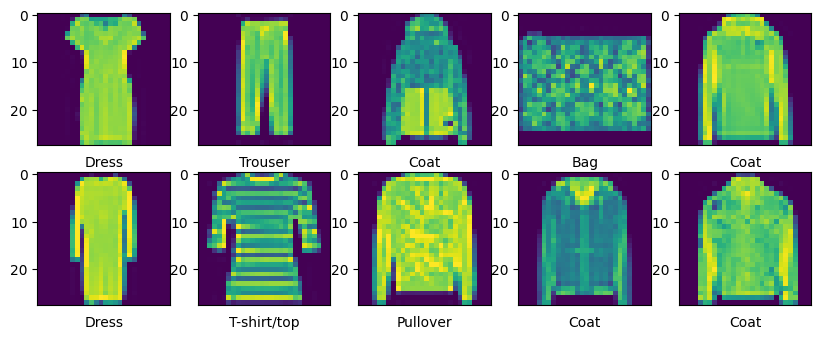

In [6]:
range_start = 20
plt.figure(figsize=(10,10))

for i in range(range_start,range_start + 10):
    plt.subplot(5,5,i-range_start+1)
    plt.xticks([])
    plt.xlabel(Categories[train_labels[i]])
    plt.imshow(train_images[i])
plt.show()

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [18]:
model=None
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(500,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 500)               392500    
                                                                 
 dense_3 (Dense)             (None, 10)                5010      
                                                                 
Total params: 397510 (1.52 MB)
Trainable params: 397510 (1.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 500)               392500    
                                                                 
 dense_3 (Dense)             (None, 10)                5010      
                                                                 
Total params: 397510 (1.52 MB)
Trainable params: 397510 (1.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
history = model.fit(train_images, train_labels, epochs=30,verbose=1,batch_size=1000,validation_split=0.1)


Epoch 1/30


/opt/app-root/lib64/python3.9/site-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


54/54 [==============================] - 2s 22ms/step - loss: 1.3111 - accuracy: 0.5924 - val_loss: 0.7371 - val_accuracy: 0.7418
Epoch 2/30
54/54 [==============================] - 1s 20ms/step - loss: 0.6544 - accuracy: 0.7606 - val_loss: 0.5886 - val_accuracy: 0.7882
Epoch 3/30
54/54 [==============================] - 1s 21ms/step - loss: 0.5559 - accuracy: 0.7997 - val_loss: 0.5166 - val_accuracy: 0.8182
Epoch 4/30
54/54 [==============================] - 1s 21ms/step - loss: 0.5045 - accuracy: 0.8211 - val_loss: 0.4976 - val_accuracy: 0.8178
Epoch 5/30
54/54 [==============================] - 1s 21ms/step - loss: 0.4745 - accuracy: 0.8316 - val_loss: 0.4600 - val_accuracy: 0.8310
Epoch 6/30
54/54 [==============================] - 1s 23ms/step - loss: 0.4510 - accuracy: 0.8407 - val_loss: 0.4468 - val_accuracy: 0.8377
Epoch 7/30
54/54 [==============================] - 1s 21ms/step - loss: 0.4335 - accuracy: 0.8483 - val_loss: 0.4307 - val_accuracy: 0.8420
Epoch 8/30
54/54 [======

In [21]:
loss, acc = model.evaluate(train_images,  train_labels, verbose=2)
print("\nTraining accuracy: ", acc)
loss, acc = model.evaluate(test_images,  test_labels, verbose=2)
print("\nTesting accuracy: ", acc)

1875/1875 - 4s - loss: 0.2951 - accuracy: 0.8936 - 4s/epoch - 2ms/step

Training accuracy:  0.8936166763305664
313/313 - 1s - loss: 0.3592 - accuracy: 0.8711 - 608ms/epoch - 2ms/step

Testing accuracy:  0.8711000084877014


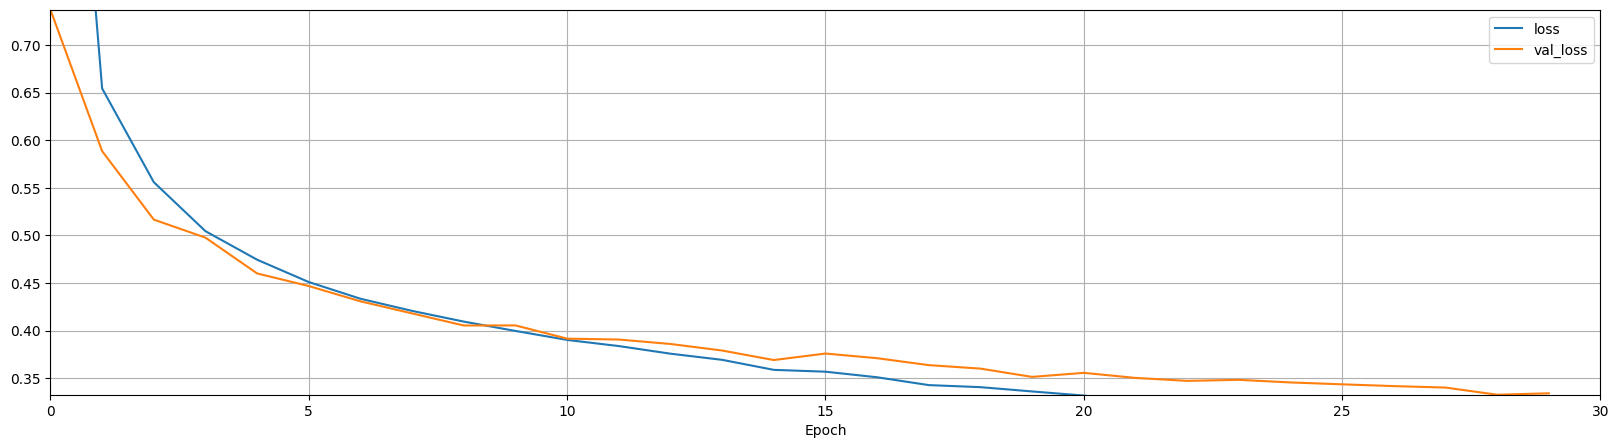

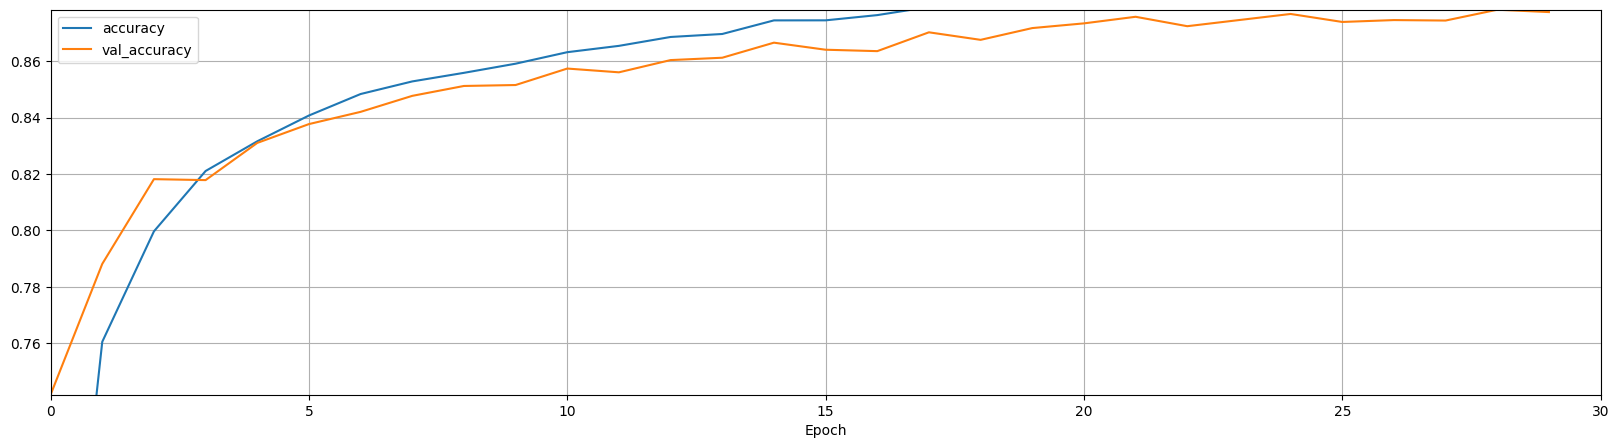

In [22]:
def plot_loss(history,data_names):
    n = 1
    plt.figure(n,figsize=(20,5))

    for i in data_names:
        plt.plot(history.history[i],label=i)
        plt.xlim([0, len(history.history[i])])
        plt.ylim([np.min(history.history[i]), np.max(history.history[i])])
        plt.xlabel('Epoch')
        #plt.ylabel(i)
        n += 1

    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss(history,['loss','val_loss'])
plot_loss(history,['accuracy','val_accuracy'])



In [23]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [24]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(Categories[predicted_label],
                                         100*np.max(predictions_array),
                                         Categories[true_label]),
               color=color)


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

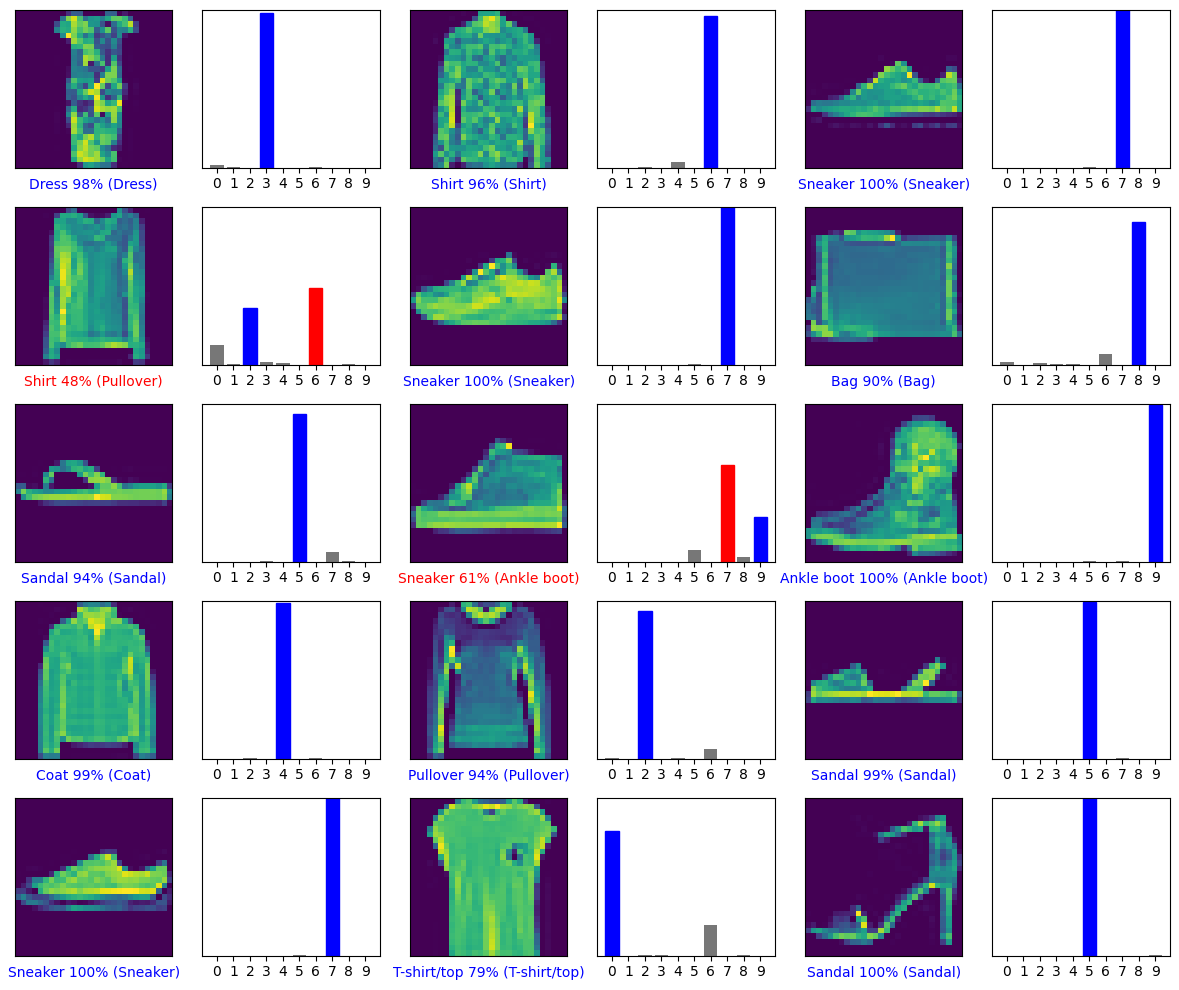

In [25]:
range_start = 100
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(range_start,range_start+num_images):
    j = i - range_start
    plt.subplot(num_rows, 2*num_cols, 2*j+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*j+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()